# Dataset Analysis

In [86]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [87]:
sns.set_style('darkgrid')

In [88]:
path = os.path.join('..', 'data', 'dataset_alpha.csv')

In [89]:
data = pd.read_csv(path)
data

,country,x1,x2,x3,x4,x5,x6,x7,x8,x23,...,GDP,pop_0_14_%,pop_0_14_%_female,pop_0_14_%_male,pop_15_64_%,pop_15_64_%_female,pop_15_64_%_male,pop_65_plus_%,pop_65_plus_%_female,pop_65_plus_%_male
0,Afghanistan,1.690000,6.870000,2.977500,2.260000,NaN,0.597500,0.327500,0.140000,0.226000,...,21.71,43.424543,42.836470,44.000703,54.171399,54.395516,53.951822,2.404058,2.768015,2.047475
1,Albania,4.460000,25.532000,4.223333,1.378667,1.842667,1.198667,1.148667,0.604000,0.534000,...,13.40,16.281724,15.945701,16.618407,67.484035,67.366308,67.601993,16.234241,16.687991,15.779600
2,Algeria,1.956562,13.983750,2.830000,1.419615,1.627778,0.507333,0.489091,0.198788,0.270294,...,227.80,30.712077,30.617768,30.802962,63.105923,62.825857,63.375825,6.182000,6.556375,5.821213
3,American Samoa,23.820000,6.660000,22.130000,1.910000,1.910000,1.000000,1.190000,2.110000,NaN,...,0.75,27.511935,26.431021,28.615012,65.643388,65.910490,65.370811,6.844676,7.658489,6.014177
4,Andorra,13.173333,40.920000,7.010000,2.073333,2.600000,1.380000,1.713333,1.370000,0.760000,...,4.80,13.074753,13.063209,13.085814,72.389731,71.570972,73.174267,14.535516,15.365819,13.739919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Venezuela,8.618824,32.763333,9.021765,1.442353,2.205882,1.928824,1.110000,0.799412,1.235714,...,209.20,28.170727,27.150558,29.211820,63.491136,63.327932,63.657687,8.338137,9.521510,7.130493
211,Vietnam,2.115882,18.662353,4.231429,0.790625,1.542353,1.689412,0.478824,0.281176,0.640526,...,187.80,22.545150,21.130319,23.995125,68.701716,68.456868,68.952645,8.753134,10.412813,7.052230
212,Yemen,6.150000,32.616667,11.158333,2.265000,2.282500,2.540000,1.610000,0.660000,1.072000,...,45.45,39.872107,39.344254,40.388712,57.438854,57.554137,57.326028,2.689038,3.101609,2.285260
213,Zambia,2.988000,18.370000,3.170000,1.152000,1.494000,1.742000,0.822000,0.458000,0.890000,...,25.61,43.262363,42.711936,43.827404,54.998707,55.174338,54.818413,1.738930,2.113726,1.354183


## Missing values

In [90]:
data.isnull().sum()

country                  0
x1                       3
x2                       3
x3                       4
x4                       4
x5                       5
x6                       3
x7                       1
x8                       1
x23                      6
x25                     10
x24                      6
x27                      9
x28                     12
x30                     14
x33                      7
x37                     17
x38                      9
x48                      4
x49                      3
unesco_props            30
safety_index            75
quality_of_life         30
total_population        19
code                     7
GDP                      9
pop_0_14_%              14
pop_0_14_%_female       14
pop_0_14_%_male         14
pop_15_64_%             14
pop_15_64_%_female      14
pop_15_64_%_male        14
pop_65_plus_%           14
pop_65_plus_%_female    14
pop_65_plus_%_male      14
dtype: int64

In [91]:
missing_values = pd.DataFrame(data.isnull().sum()).reset_index()

Text(0.5, 1.0, 'Number of missing values in each feature of the dataset')

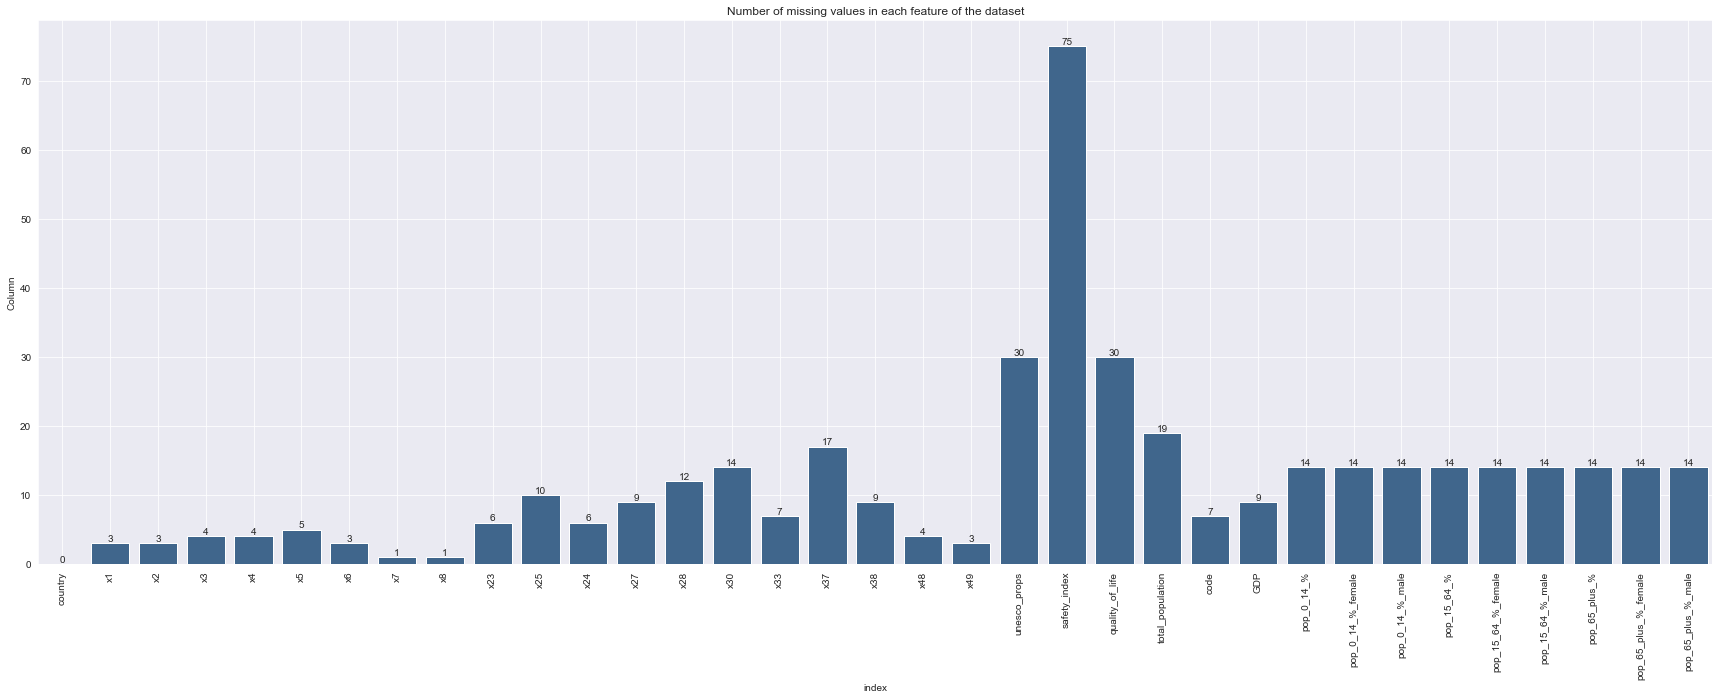

In [92]:
plt.figure(figsize=(30, 10))
ax = sns.barplot(data=missing_values, x='index', y=0, color=(0.2, 0.4, 0.6, 0.6))
for i in ax.containers:
    ax.bar_label(i,)
plt.grid(True)
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.ylabel('Column')
plt.title('Number of missing values in each feature of the dataset')

## Data distribution and values

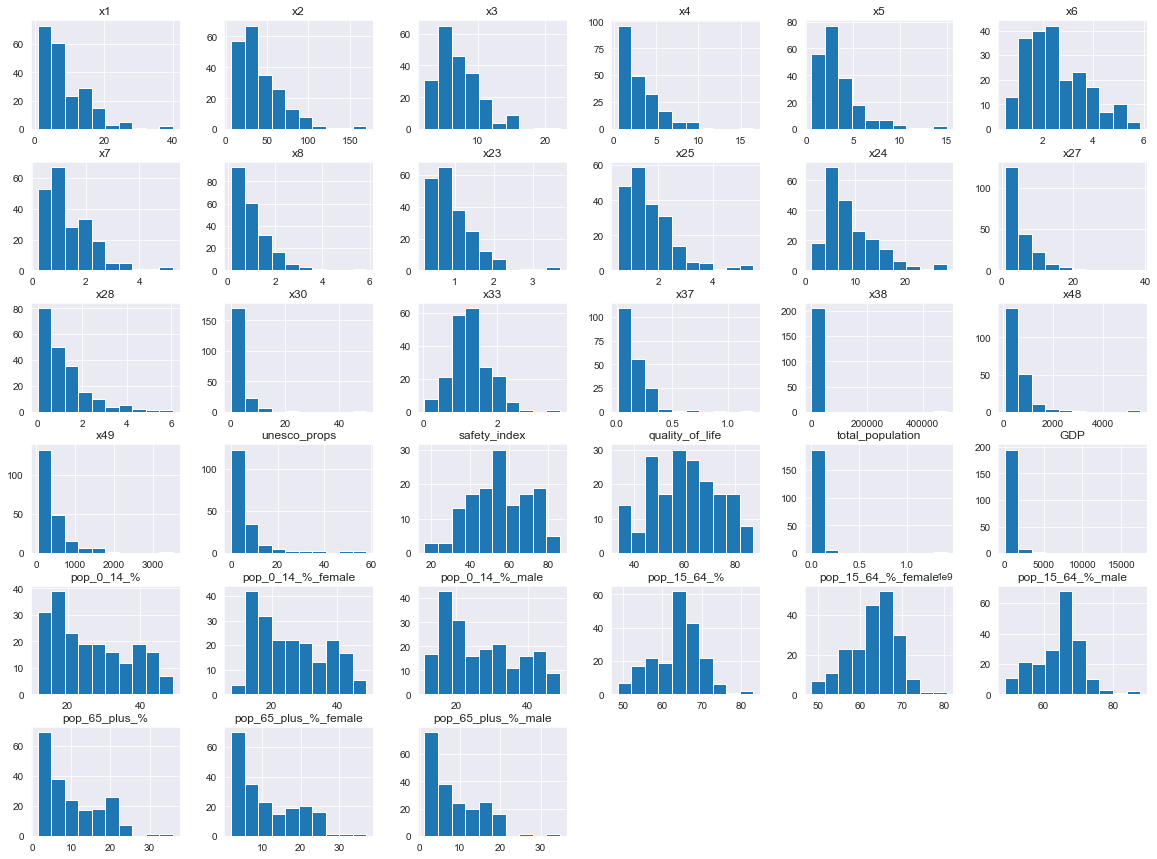

In [104]:
data.hist(figsize=(20, 15))
plt.show()

## Data types

In [79]:
data.loc[data.unesco_props.isnull(), 'unesco_props'] = -1
data.unesco_props = data.unesco_props.astype(int)
data.loc[data.total_population.isnull(), 'total_population'] = -1
data.total_population = data.total_population.astype(int)

<AxesSubplot: title={'center': '% of each data type'}, ylabel='Type of variable'>

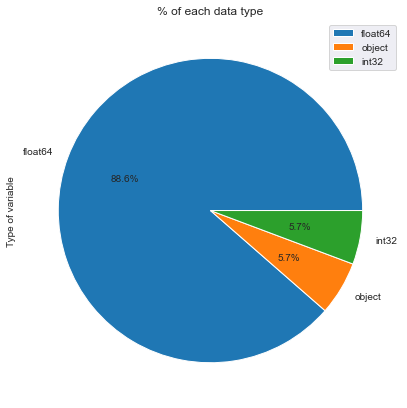

In [80]:
counts = pd.DataFrame(data.dtypes.value_counts(), columns=['Type of variable'])
counts.plot(kind='pie', y='Type of variable', figsize=(7, 7), title='% of each data type',  autopct='%1.1f%%')

In [81]:
data.loc[data.unesco_props == -1, 'unesco_props'] = np.NaN
data.loc[data.total_population == -1, 'total_population'] = np.NaN